/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


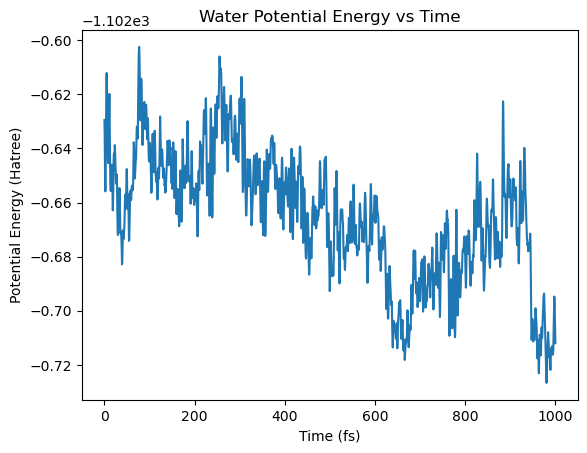

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.coordinates.timestep as ts
import MDAnalysis.transformations as tf


#Plot the energy versus time, as read in from the .ener file

#Read in the .ener file
ener = np.loadtxt('Runs/Water/water_aimd_1ns_every0.5fs-1.ener')

#Plot the energy versus time
plt.plot(ener[:,1],ener[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (Hatree)')
plt.title('Water Potential Energy vs Time')
plt.savefig('Water_Energy_vs_Time')
plt.show()

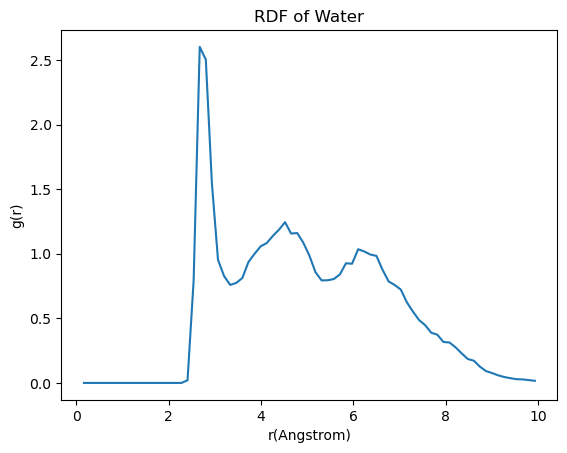

In [25]:
top = 'Runs/Water/water.xyz'
traj = 'Runs/Water/water_aimd_1ns_every0.5fs-pos-1.xyz'

u = mda.Universe(top, traj)

dimension = [12.42, 12.42, 12.42, 90.0, 90.0, 90.0]

#Set the box dimensions

transform = tf.boxdimensions.set_dimensions(dimension)
u.trajectory.add_transformations(transform)

#compute the RDF
RDF = rdf.InterRDF(u.select_atoms('name O'), u.select_atoms('name O'), range=(0.1, 10))
RDF.run()

plt.plot(RDF.results.bins, RDF.results.rdf)
plt.xlabel('r(Angstrom)')
plt.ylabel('g(r)')
plt.title('RDF of Water')
plt.savefig('Water_RDF.png')
plt.show()

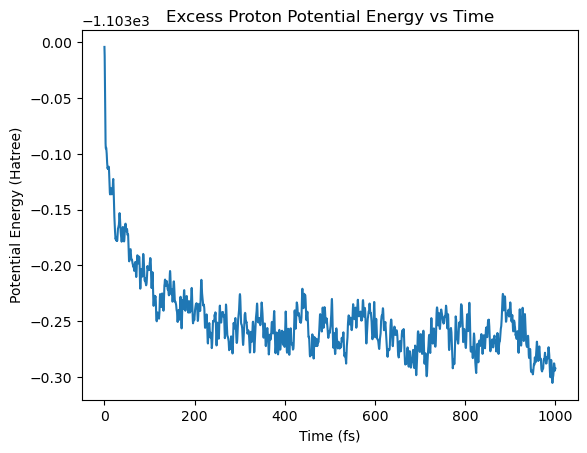

In [3]:
ener_proton = np.loadtxt('Runs/Protons/proton_aimd_1ns_every0.5fs-1.ener')

#Plot the energy versus time
plt.plot(ener_proton[:,1],ener_proton[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (Hatree)')
plt.title('Excess Proton Potential Energy vs Time')
plt.savefig('Proton_Energy_vs_Time')
plt.show()

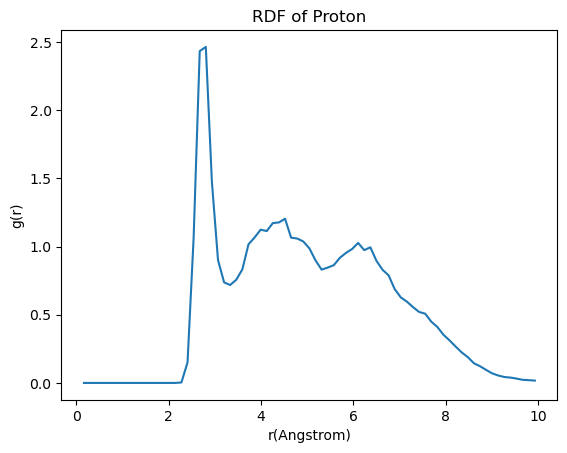

In [7]:
top = 'Runs/Protons/proton.xyz'
traj = 'Runs/Protons/proton_aimd_1ns_every0.5fs-pos-1.xyz'

u = mda.Universe(top, traj)

dimension = [12.42, 12.42, 12.42, 90.0, 90.0, 90.0]

#Set the box dimensions

transform = tf.boxdimensions.set_dimensions(dimension)
u.trajectory.add_transformations(transform)

#compute the RDF
RDF = rdf.InterRDF(u.select_atoms('name O'), u.select_atoms('name O'), range=(0.1, 10))
RDF.run()

plt.plot(RDF.results.bins, RDF.results.rdf)
plt.xlabel('r(Angstrom)')
plt.ylabel('g(r)')
plt.title('RDF of Proton')
plt.savefig('Proton_RDF.png')
plt.show()